<a href="https://colab.research.google.com/github/kannursaya/ML_Algorithms/blob/main/ml_logical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Hello again today we are going to make this task: "Определить, уйдёт ли сотрудник из компании (churn prediction)"

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Загрузка данных
df = pd.read_csv('HR_comma_sep.csv')

In [12]:
print("Первые 5 строк данных:")
print(df.head())
print("\nРазмер данных:", df.shape)
print("\nТипы данных:")
print(df.dtypes)
print("\nПропущенные значения:")
print(df.isnull().sum())
print("\nСтатистическое описание данных:")
print(df.describe())

Первые 5 строк данных:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  

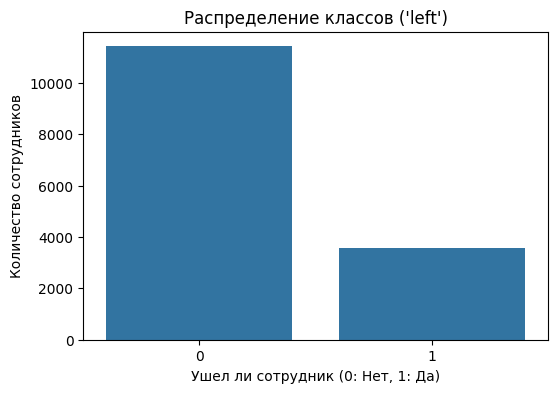

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='left', data=df)
plt.title("Распределение классов ('left')")
plt.xlabel("Ушел ли сотрудник (0: Нет, 1: Да)")
plt.ylabel("Количество сотрудников")
plt.show()


In [14]:
print("\nПропорции классов в столбце 'left':")
print(df['left'].value_counts(normalize=True))



Пропорции классов в столбце 'left':
left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


In [15]:
df_encoded = pd.get_dummies(df, columns=['sales', 'salary'], drop_first=True)

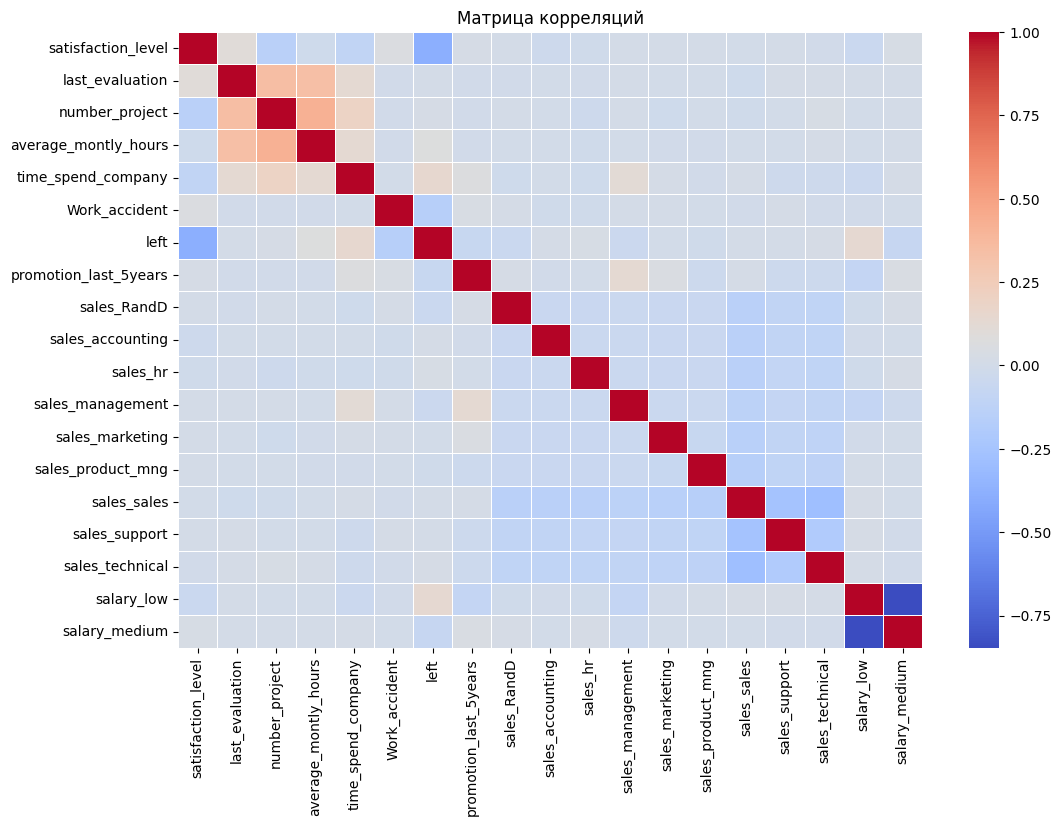

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Матрица корреляций")
plt.show()

In [17]:
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nРазмер обучающей выборки X_train: {X_train.shape}")
print(f"Размер тестовой выборки X_test: {X_test.shape}")
print(f"Пропорции класса 'left' в обучающей выборке:\n{y_train.value_counts(normalize=True)}")
print(f"Пропорции класса 'left' в тестовой выборке:\n{y_test.value_counts(normalize=True)}")


Размер обучающей выборки X_train: (11999, 18)
Размер тестовой выборки X_test: (3000, 18)
Пропорции класса 'left' в обучающей выборке:
left
0    0.761897
1    0.238103
Name: proportion, dtype: float64
Пропорции класса 'left' в тестовой выборке:
left
0    0.762
1    0.238
Name: proportion, dtype: float64


In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear', random_state=42))
])

# Обучаем модель
pipeline.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1] # Вероятности для класса 1 (отток)

print("\n--- Отчет о классификации (Базовая модель с балансировкой весов и масштабированием) ---")
print(classification_report(y_test, y_pred))



--- Отчет о классификации (Базовая модель с балансировкой весов и масштабированием) ---
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      2286
           1       0.51      0.81      0.63       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.79      3000



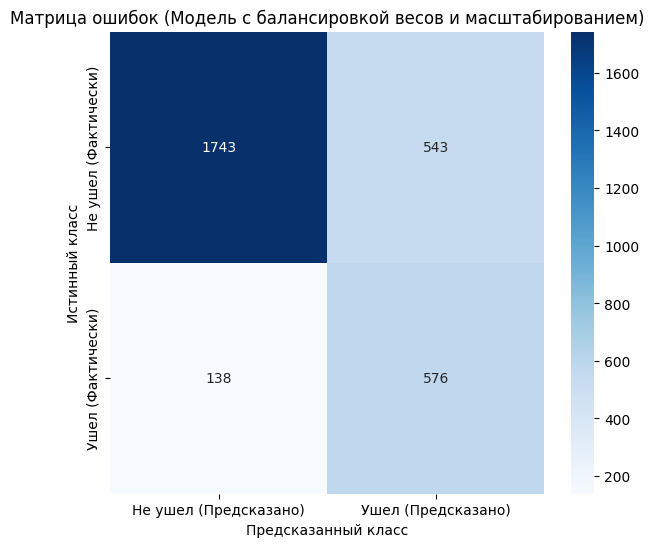

In [21]:
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не ушел (Предсказано)', 'Ушел (Предсказано)'],
            yticklabels=['Не ушел (Фактически)', 'Ушел (Фактически)'])
plt.title("Матрица ошибок (Модель с балансировкой весов и масштабированием)")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.show()